In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data/pop_data/source-data-unhcr-pdf-reports.csv')

df.head()

,#date,days,Niger,Burkina,Maurit,Togo,Guinea,Total,Internally Displaced
0,08-03-2012,0,16134,22639,34156,20,45,69350,81463
1,19-03-2012,11,18965,22974,39490,20,45,81494,93439
2,30-03-2012,22,19927,22974,46008,20,45,88974,93439
3,24-04-2012,47,36688,46354,60998,20,45,144105,132724
4,15-05-2012,68,38242,56817,61287,20,44,156410,146900


In [3]:

date = pd.to_datetime(df['#date'],format = '%d-%m-%Y')
nig = np.array(df['Niger'])
bf = np.array(df['Burkina']+df['Togo'])
mau = np.array(df['Maurit'])
gui = np.array(df['Guinea'])
ref = np.array(df['Total'])
idp = np.array(df['Internally Displaced'])
oth = ref - nig - bf - mau - gui




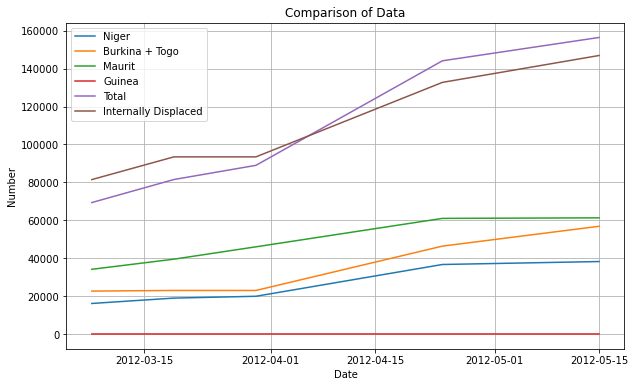

In [4]:
plt.figure(figsize=(10, 6))

plt.plot(date, nig, label='Niger')
plt.plot(date, bf, label='Burkina + Togo')
plt.plot(date, mau, label='Maurit')
plt.plot(date, gui, label='Guinea')
plt.plot(date, ref, label='Total')
plt.plot(date, idp, label='Internally Displaced')

plt.xlabel('Date')
plt.ylabel('Number')
plt.title('Comparison of Data')
plt.legend()
plt.grid(True)

plt.show()

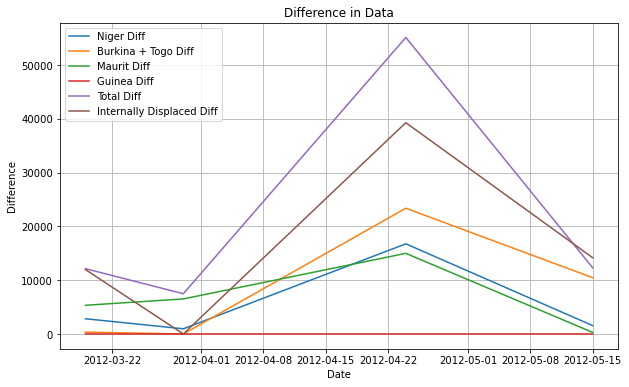

In [5]:
date = pd.to_datetime(df['#date'], format='%d-%m-%Y')
nig_diff = np.diff(np.array(df['Niger']))
bf_diff = np.diff(np.array(df['Burkina'] + df['Togo']))
mau_diff = np.diff(np.array(df['Maurit']))
gui_diff = np.diff(np.array(df['Guinea']))
ref_diff = np.diff(np.array(df['Total']))
idp_diff = np.diff(np.array(df['Internally Displaced']))

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(date[1:], nig_diff, label='Niger Diff')
plt.plot(date[1:], bf_diff, label='Burkina + Togo Diff')
plt.plot(date[1:], mau_diff, label='Maurit Diff')
plt.plot(date[1:], gui_diff, label='Guinea Diff')
plt.plot(date[1:], ref_diff, label='Total Diff')
plt.plot(date[1:], idp_diff, label='Internally Displaced Diff')

plt.xlabel('Date')
plt.ylabel('Difference')
plt.title('Difference in Data')
plt.legend()
plt.grid(True)

plt.show()

In [6]:
date_range = pd.date_range(start='2012-01-01', end='2013-01-01')

def prepare_data(df, date_col, value_col, date_range):
    df[date_col] = pd.to_datetime(df[date_col], format='%Y-%m-%d')
    df.set_index(date_col, inplace=True)

    # Interpolating missing dates
    df = df.reindex(date_range).interpolate(method='time')

    # Extrapolating the first and last values if necessary
    df = df.fillna(method='ffill').fillna(method='bfill')

    return df

#nig

tabareybarey = pd.read_csv('Data/pop_data/nig-tabareybarey.csv')
tabareybarey = prepare_data(tabareybarey, '#DateTime','Nombre estimé de réfugiés maliens par période (border opens 21st of March 2012)', date_range)

niamey = pd.read_csv('Data/pop_data/nig-niamey.csv')
niamey = prepare_data(niamey, '#DateTime','Nombre estimé de réfugiés maliens par période', date_range)

mangaize = pd.read_csv('Data/pop_data/nig-mangaize.csv')
mangaize = prepare_data(mangaize, '#DateTime','Nombre estimé de réfugiés maliens par période', date_range)

intikane = pd.read_csv('Data/pop_data/nig-intikane.csv')
intikane = prepare_data(intikane, 'DateTime','Nombre estimé de réfugiés maliens par période', date_range)

abala = pd.read_csv('Data/pop_data/nig-abala.csv')
abala = prepare_data(abala, '#DateTime','Nombre estimé de réfugiés maliens par période', date_range)

#mau

mbera = pd.read_csv('Data/pop_data/mau-mbera.csv')
mbera = prepare_data(mbera, 'DateTime','Réfugiés maliens', date_range)

fassala = pd.read_csv('Data/pop_data/mau-fassala.csv')
fassala = prepare_data(fassala, 'DateTime','Réfugiés maliens', date_range)

#bf

ouagadougou = pd.read_csv('Data/pop_data/bf-ouagadougou.csv')
ouagadougou = prepare_data(ouagadougou, '#DateTime','Nombre estimé de réfugiés maliens par période', date_range)

mentao = pd.read_csv('Data/pop_data/bf-mentao.csv')
mentao = prepare_data(mentao, '#DateTime','Nombre estimé de réfugiés maliens par période (border opens on 21st of March)', date_range)

goudoubo = pd.read_csv('Data/pop_data/bf-goudoubo.csv')
goudoubo = prepare_data(goudoubo, '#DateTime','Nombre estimé de réfugiés maliens par période', date_range)

bobo = pd.read_csv('Data/pop_data/bf-bobo.csv')
bobo = prepare_data(bobo, '#DateTime','Nombre estimé de réfugiés maliens par période (border opens 21st of March 2012)', date_range)

camps = [bobo,goudoubo,ouagadougou,fassala,mbera,abala,intikane,mangaize,niamey,tabareybarey]




  

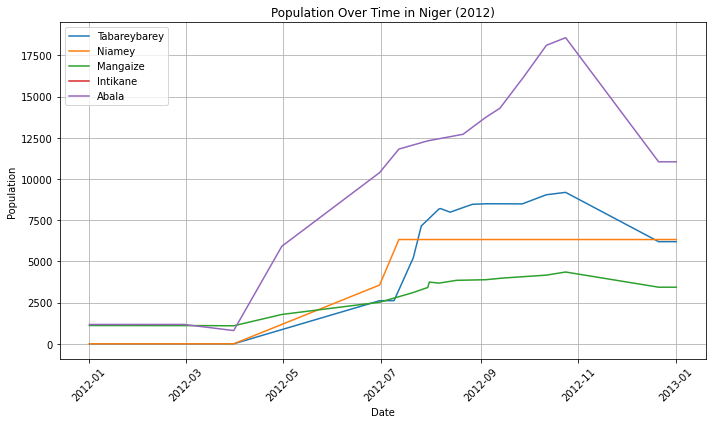

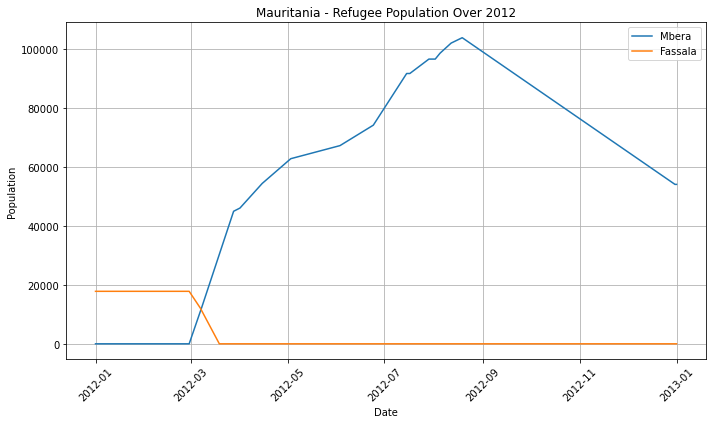

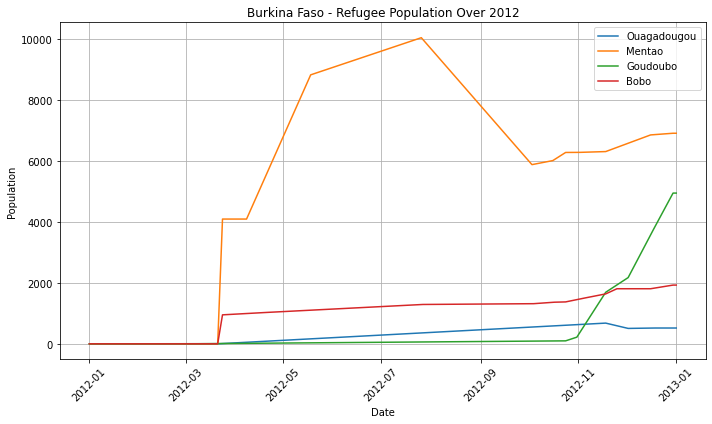

In [7]:
plt.figure(figsize=(10, 6))

# Plot for Niger
plt.plot(tabareybarey.index, tabareybarey['Nombre estimé de réfugiés maliens par période (border opens 21st of March 2012)'], label='Tabareybarey')
plt.plot(niamey.index, niamey['Nombre estimé de réfugiés maliens par période'], label='Niamey')
plt.plot(mangaize.index, mangaize['Nombre estimé de réfugiés maliens par période'], label='Mangaize')
plt.plot(intikane.index, intikane['Nombre estimé de réfugiés maliens par période'], label='Intikane')
plt.plot(abala.index, abala['Nombre estimé de réfugiés maliens par période'], label='Abala')

plt.title('Population Over Time in Niger (2012)')  
plt.xlabel('Date')  
plt.ylabel('Population') 
plt.grid(True)  
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()  
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(mbera.index, mbera['Réfugiés maliens'], label='Mbera')
plt.plot(fassala.index, fassala['Réfugiés maliens'], label='Fassala')
plt.title('Mauritania - Refugee Population Over 2012')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(ouagadougou.index, ouagadougou['Nombre estimé de réfugiés maliens par période'], label='Ouagadougou')
plt.plot(mentao.index, mentao['Nombre estimé de réfugiés maliens par période (border opens on 21st of March)'], label='Mentao')
plt.plot(goudoubo.index, goudoubo['Nombre estimé de réfugiés maliens par période'], label='Goudoubo')
plt.plot(bobo.index, bobo['Nombre estimé de réfugiés maliens par période (border opens 21st of March 2012)'], label='Bobo')

plt.title('Burkina Faso - Refugee Population Over 2012')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
import numpy as np 

# Age groups and their population
age_groups = [(90, 100), (80, 89), (70, 79), (60, 69), (50, 59), (40, 49), (30, 39), (20, 29), (10, 19), (0, 9)]
populations = [21_510, 88_052, 289_198, 632_542, 984_684, 1_569_836, 2_451_989, 3_466_640, 5_240_091, 7_650_947]

# Calculate the total population
total_population = sum(populations)

# Calculate probabilities for each age group
probabilities = [pop / total_population for pop in populations]

# Calculate the cumulative distribution
cumulative_distribution = np.cumsum(probabilities)

def generate_random_age(cumulative_distribution, age_groups):
    # Generate a random float in the range [0, 1)
    rand = np.random.random()
    
    # Find the age group corresponding to the random number
    for i, threshold in enumerate(cumulative_distribution):
        if rand < threshold:
            # Return a random age within the selected age group
            return np.random.randint(age_groups[i][0], age_groups[i][1] + 1)

# Example: Generate a random age
random_age = generate_random_age(cumulative_distribution, age_groups)
print(f"Random Age: {random_age}")

Random Age: 18


In [9]:
#nig

tabareybarey = pd.read_csv('Data/pop_data/nig-tabareybarey.csv')

niamey = pd.read_csv('Data/pop_data/nig-niamey.csv')

mangaize = pd.read_csv('Data/pop_data/nig-mangaize.csv')

intikane = pd.read_csv('Data/pop_data/nig-intikane.csv')

abala = pd.read_csv('Data/pop_data/nig-abala.csv')

#mau

mbera = pd.read_csv('Data/pop_data/mau-mbera.csv')

fassala = pd.read_csv('Data/pop_data/mau-fassala.csv')

#bf

ouagadougou = pd.read_csv('Data/pop_data/bf-ouagadougou.csv')

mentao = pd.read_csv('Data/pop_data/bf-mentao.csv')

goudoubo = pd.read_csv('Data/pop_data/bf-goudoubo.csv')

bobo = pd.read_csv('Data/pop_data/bf-bobo.csv')

camps = [bobo,goudoubo,ouagadougou,fassala,mbera,abala,intikane,mangaize,niamey,tabareybarey]


for camp in camps:
    print(f"{max(camp)} for")

Nombre estimé de réfugiés maliens par période (border opens 21st of March 2012) for
Nombre estimé de réfugiés maliens par période for
Nombre estimé de réfugiés maliens par période for
Réfugiés maliens for
Réfugiés maliens for
Nombre estimé de réfugiés maliens par période for
Nombre estimé de réfugiés maliens par période for
Nombre estimé de réfugiés maliens par période for
Nombre estimé de réfugiés maliens par période for
Nombre estimé de réfugiés maliens par période (border opens 21st of March 2012) for


In [11]:
labor_df = pd.read_csv("Data/Push/untitled folder/social-protection-and-labor_mli.csv")

In [12]:
labor_df.head

<bound method NDFrame.head of        Country Name   Country ISO3        Year  \
0     #country+name  #country+code  #date+year   
1              Mali            MLI        2018   
2              Mali            MLI        2009   
3              Mali            MLI        2018   
4              Mali            MLI        2009   
...             ...            ...         ...   
3458           Mali            MLI        1994   
3459           Mali            MLI        1993   
3460           Mali            MLI        1992   
3461           Mali            MLI        1991   
3462           Mali            MLI        1990   

                                         Indicator Name  \
0                                       #indicator+name   
1     Adequacy of benefits in extreme poor (<$2.15 a...   
2     Adequacy of benefits in extreme poor (<$2.15 a...   
3     Adequacy of benefits in extreme poor (<$2.15 a...   
4     Adequacy of benefits in extreme poor (<$2.15 a...   
...            